## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction of Data**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive     
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Hotel_booking_analysis_project/Hotel Bookings.csv"

Mounted at /content/drive


In [3]:
df = pd.read_csv(file_path)

In [60]:
df.shape

(119390, 32)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [4]:
#Make a copy of df for whole work
hotel_df = df.copy()
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# checking for the duplicate rows
duplicate_rows = hotel_df.duplicated().value_counts()
duplicate_rows 
# list(hotel_df.duplicated().unique())

False    87396
True     31994
dtype: int64

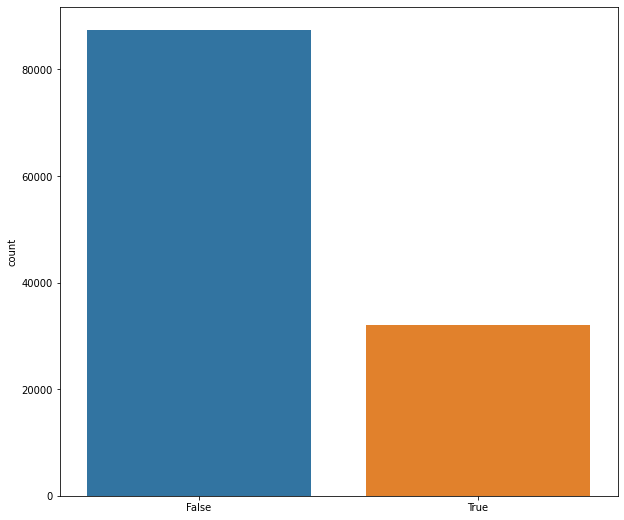

In [6]:
# Visulizing through Count pot
plt.figure(figsize=(10,9))
# plt.bar(list(hotel_df.duplicated().unique()), [i for i in list(duplicate_rows)])
sns.countplot(x=hotel_df.duplicated())

In [7]:
#dropping the duplicate rows
hotel_df= hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

In [8]:
#checking for Null Values
hotel_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values')

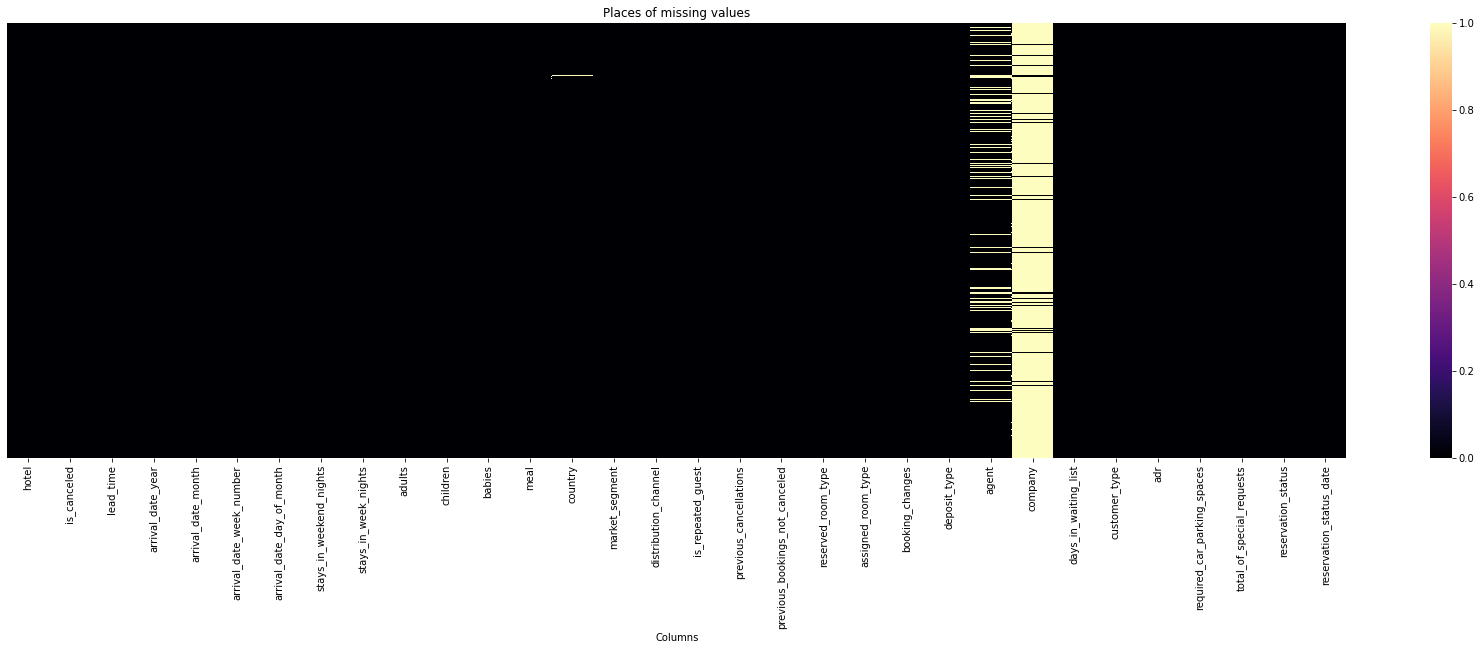

In [9]:
# watching null values by heatmap.
plt.figure(figsize=(30, 8))
sns.heatmap(hotel_df.isnull(), cbar=True, yticklabels=False,cmap='magma')
plt.xlabel("Columns")
plt.title("Places of missing values")

In [10]:
# replacing null values with 0.
null_cols=['company','agent','children']
for col in null_cols:
  hotel_df[col].fillna(0,inplace=True)


In [11]:
# NA values with 'others'
hotel_df['country'].fillna('others',inplace=True)

In [12]:
#checking for Null Values again
hotel_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [13]:
# creating two new columns

hotel_df['total_people'] = hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']   
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights'] 
hotel_df.shape 

(87396, 34)

#**EDA (Exploratory Data Analysis)**

## **Univariate Analysis**

### **1) Which type of hotel is most prefered by people?**
### Visualizsing the by pie chart.

Text(0.5, 1.0, 'Pie Chart of Most Preffered  Hotel')

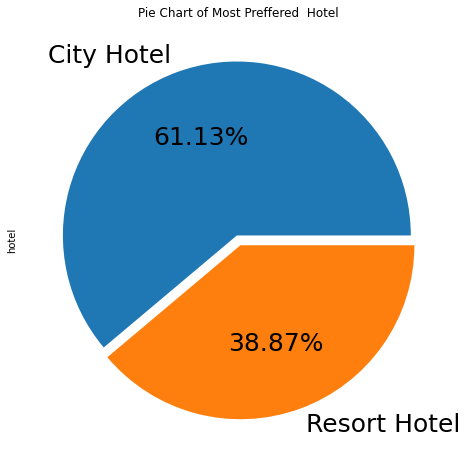

In [41]:
# Visualizsing the by pie chart.
hotel_df['hotel'].value_counts().plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=False, figsize=(15,8),fontsize=25)   
plt.title('Pie Chart of Most Preffered  Hotel')

#### **Observation**
#### City Hotel is most preffered hotel by people beacuse it has 61.13% bookings.

### **2) Which Agent made the most bookings?**
###Visualizsing the by bar chart.

In [42]:
# return highest bookings made by agents
booking_count_by_agent = hotel_df["agent"].value_counts().reset_index()
booking_count_by_agent.sort_values(by="agent", ascending=False)
# taking top 10 agents made by agent
top_ten_agents=booking_count_by_agent[:10]
top_ten_agents["index"] = top_ten_agents["index"].apply(lambda x:str(x))

top_ten_agents



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,agent
0,9.0,28759
1,240.0,13028
2,0.0,12193
3,14.0,3349
4,7.0,3300
5,250.0,2779
6,241.0,1644
7,28.0,1502
8,8.0,1383
9,1.0,1232


Text(0.5, 1.0, 'Most Bookings Made by The Agents')

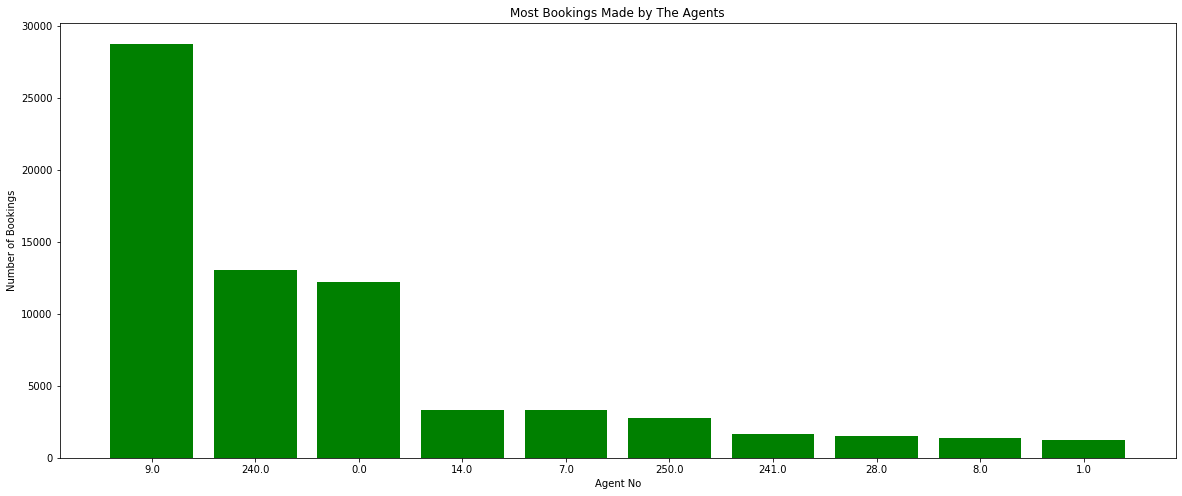

In [43]:
plt.figure(figsize=(20,8))
plt.bar("index","agent",data=top_ten_agents,color="green")
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by The Agents")

####  **Observation**
#### Agent ID no: 9.0 made most of the bookings

### **3)What is the pecentage of cancellation?**
###Visualizsing the by pie chart.

Text(0.5, 1.0, 'Cancellation and non Cancellation')

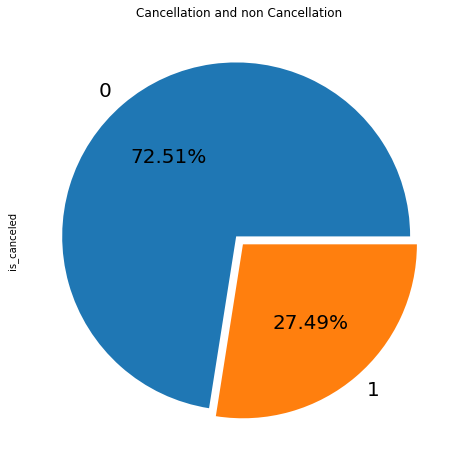

In [44]:
hotel_df['is_canceled'].value_counts().plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=False, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

#### **Observation :**
####0= not cancled
####1= canceled
####27.49 % of the bookings were cancelled.

### **4) What is the Percentage of repeated guests?**
###Visualizsing the by pie chart.

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

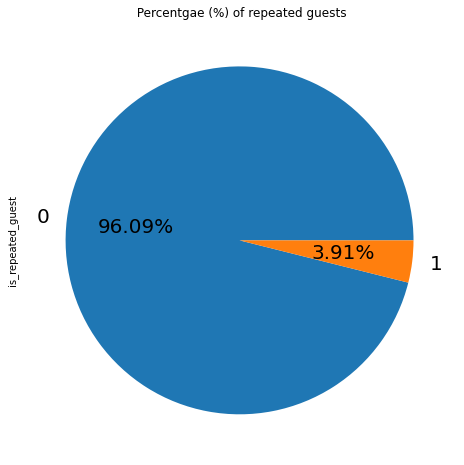

In [45]:
hotel_df['is_repeated_guest'].value_counts().plot.pie(explode=(0.00,0.00),autopct='%1.2f%%',shadow=False,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

#### **Observation:**
####Repeated guests are very few which only 3.91 %.
#### Guests management should take feedbacks from guests and try to imporve the services.

### **5) What is the percentage distribution of "Customer Type"?**
### Visualizsing the by pie chart.

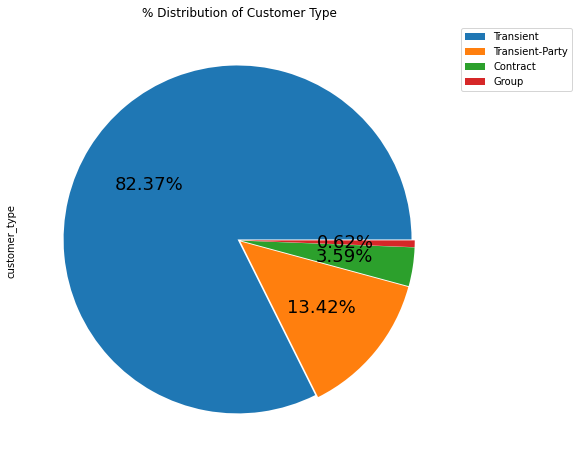

In [46]:
hotel_df['customer_type'].value_counts().plot.pie(explode=[0.01]*4,shadow=False,autopct='%1.2f%%',figsize=(18,8),fontsize=18,labels=None)


labels=hotel_df['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels)

**1. Contract**

When the booking has an allotment or other type of contract associated to it

**2. Group**

When the booking is associated to a group

**3. Transient**

When the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**

When the booking is transient, but is associated to at least other transient booking

#### **Observation:**
####Transient customer type is more whcih is 82.37 %. percentage of Booking associated by the Group is vey low.

### **6)What is the percentage distribution of required car parking spaces?**

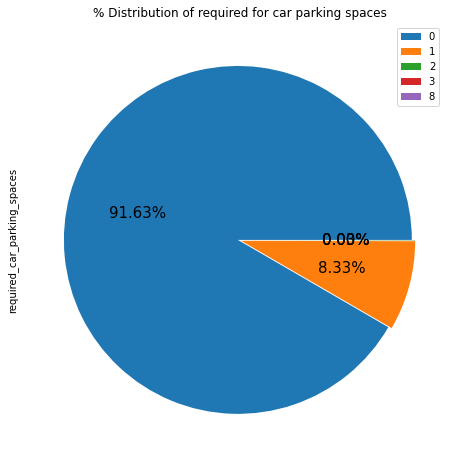

In [47]:
hotel_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.01]*5, autopct='%1.2f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=hotel_df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required for car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#### **Observation**
####91.63 % guests did not required the parking space. only 8.33 % guests required only 1 parking space.

### **7)What is the percentage of booking changes made by the customer.?**
###Visualizsing the by bar chart.

Text(0, 0.5, 'Percentage(%)')

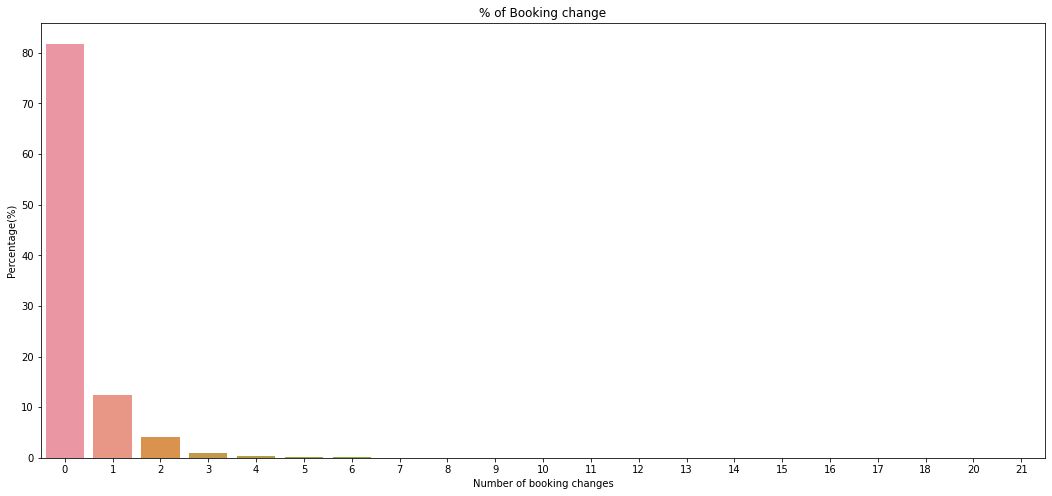

In [48]:
booking_changes_df=hotel_df['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(18,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/hotel_df.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

**0= 0 changes made in the booking**
**1= 1 changes made in the booking**
**2= 2 changes made in the booking **
#### **Observation**
#### 80% -83% of the bookings were not changed by the people.

### **8)What is Percentage distribution of Deposite type ?**

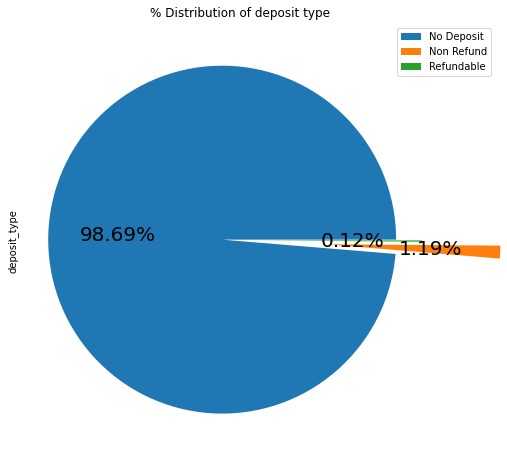

In [49]:
hotel_df['deposit_type'].value_counts().plot.pie(explode=(0.1,0.5,0.05),autopct='%1.2f%%',shadow=False,figsize=(18,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=hotel_df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#### **Observation**
####98.69 % of the guests prefer "No deposit" type of deposit.

### **9) Which type of food is mostly preferred by the guests?**

Text(0.5, 1.0, 'Preferred Meal Type')

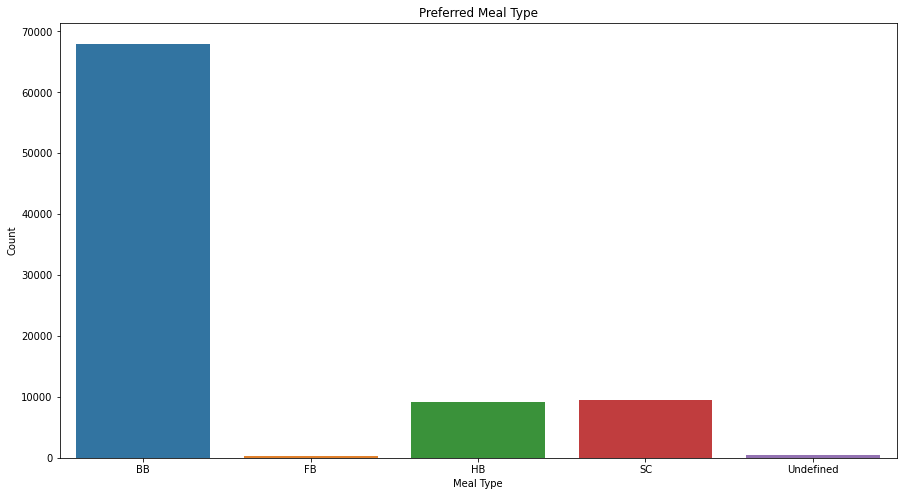

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x=hotel_df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

**Types of meal in hotels:**

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering) 
#### **Observation **
#### So the most preferred meal type by the guests is BB( Bed and Breakfast) 
#### HB- (Half Board) and SC- (Self Catering) are equally preferred.

### **10) From which country the most guests are coming?**

Text(0.5, 1.0, 'Number of Guests From Diffrent Countries')

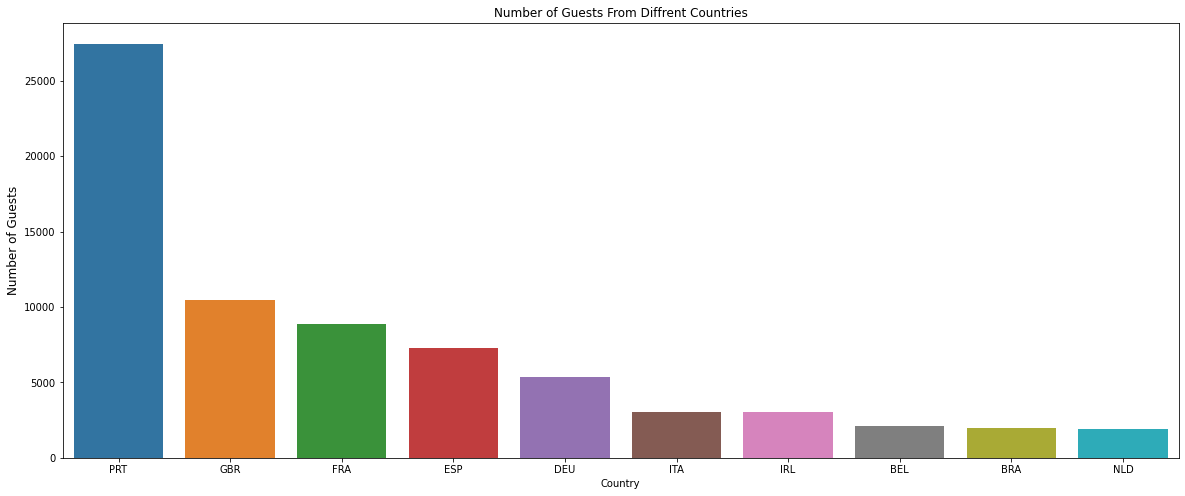

In [51]:
# Counting the guests from various countries.
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of Guests',fontsize=12)
plt.title("Number of Guests From Diffrent Countries")

In [75]:
#importing the folium library
import folium                                # searched on google 
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count of guests'], hover_name = country_df['country'])
# guests_map
guests_map.show()

#### **Observation**
####Most of the guests are coming from portugal i.e more 25000 guests are from portugal

**Abbreevations for countries-**

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

### **11) Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room type')

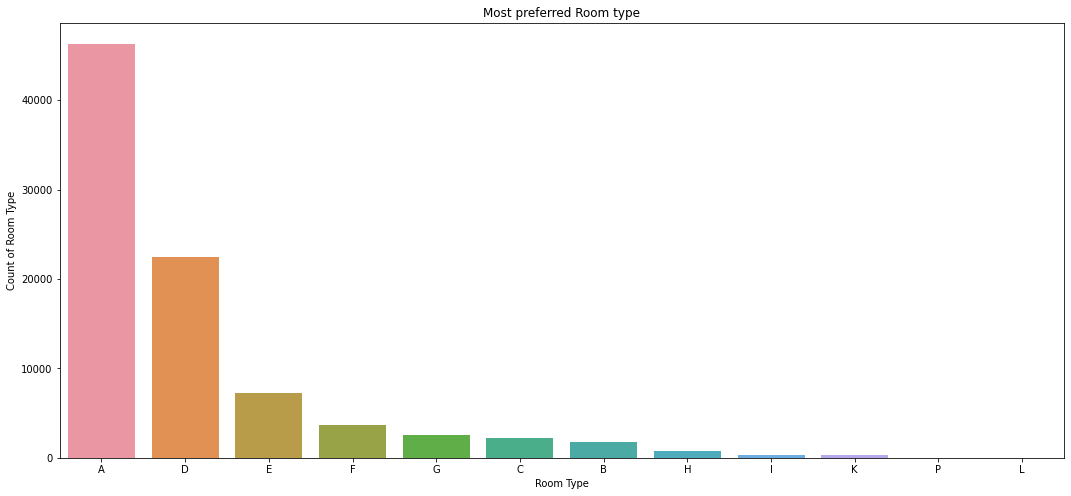

In [53]:
plt.figure(figsize=(18,8))

sns.countplot(x=hotel_df['assigned_room_type'],order=hotel_df['assigned_room_type'].value_counts().index)

plt.xlabel('Room Type')
plt.ylabel('Count of Room Type')
plt.title("Most preferred Room type")

#### **Observation**
####The most preferred Room type is "A".

### **12)In which month most of the bookings happened?**

In [54]:
bookings_by_months_df=hotel_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

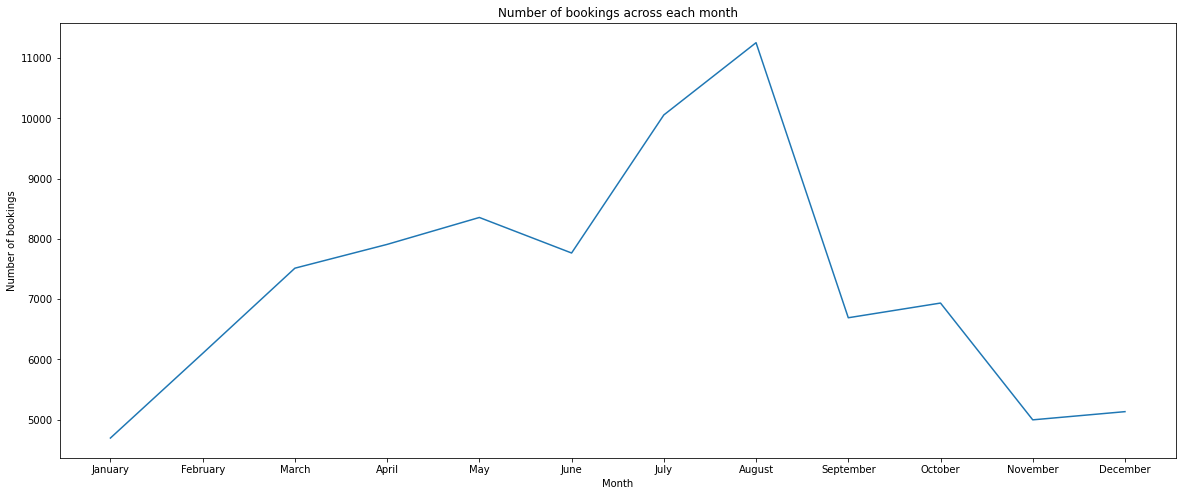

In [55]:
plt.figure(figsize=(20,8))

sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

#### **Observation**
####July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

### **13) Which Distribution channel is mostly used for hotel bookings?**
###Visualizsing the by pie chart.

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

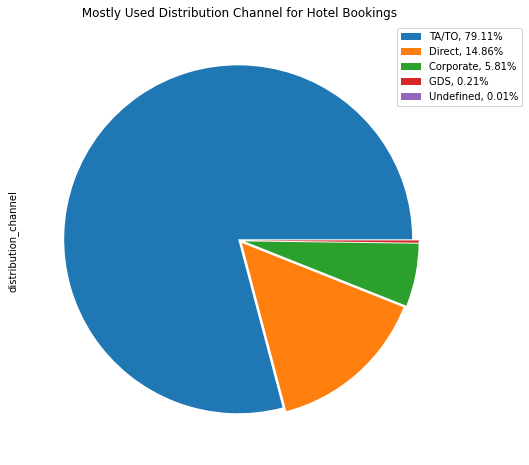

In [56]:
label=hotel_df['distribution_channel'].value_counts().index.tolist()

distribution_channel_df=hotel_df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/hotel_df.shape[0],2)

sizes=distribution_channel_df['percentage'].values.tolist()
hotel_df['distribution_channel'].value_counts().plot.pie(explode=[0.01, 0.02,0.03,0.03,0.01], shadow=False, figsize=(18,8),fontsize=10,labels=None)   

label = [f'{l}, {s}%' for l, s in zip(label, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=label)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

#### **Observation:**
####'TA/TO' is mostly(79.11%) used for booking hoetls

### **14) Which year had the highest bookings?**

Text(0.5, 1.0, 'Year Wise bookings')

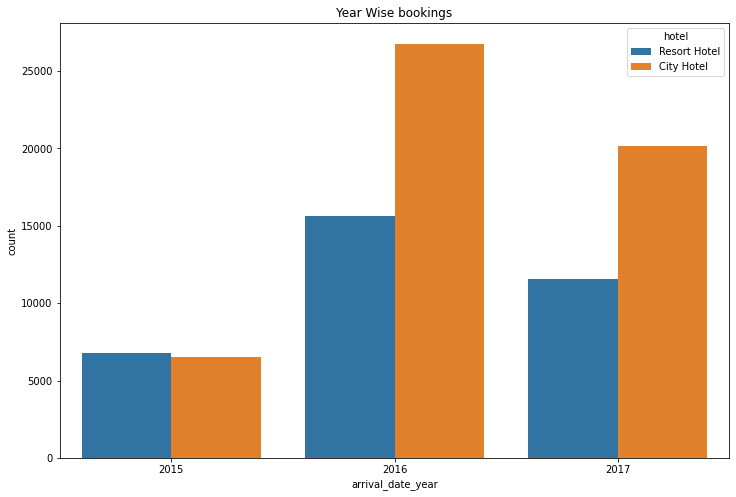

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(x=hotel_df['arrival_date_year'],hue=hotel_df['hotel'])
plt.title("Year Wise bookings")

#### **Observation**
**2016 had the higest bookings.**

**2015 had less 7000 bookings.**

#### City hotels had the most of the bookings.

## **Bivariate and Multivariate Analysis**

In [24]:
group_by_hotel=hotel_df.groupby('hotel')

### **1) Which Hotel type has the highest ADR?**

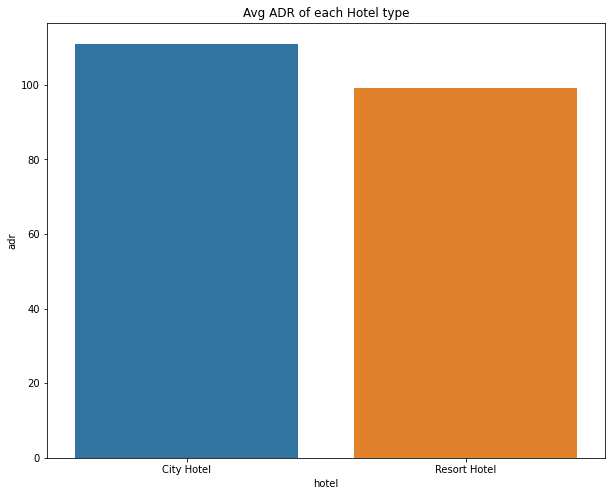

In [25]:
highest_adr=group_by_hotel['adr'].mean().reset_index()

plt.figure(figsize=(10,8))

plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

####** Observation**
####City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

### **2) Which hotel type has the more lead time?**

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

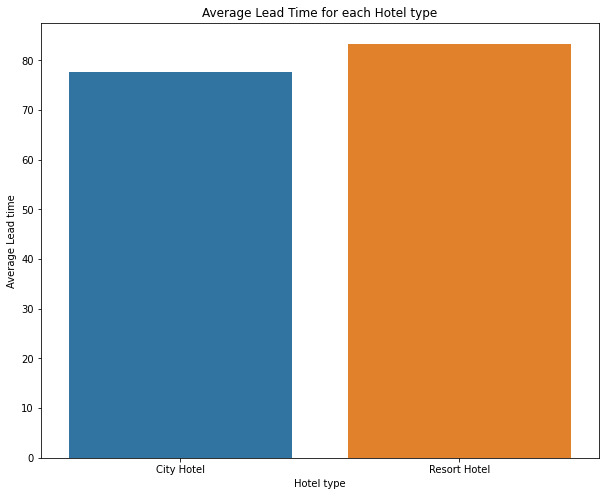

In [26]:
avg_lead_time=group_by_hotel['lead_time'].mean().reset_index()

plt.figure(figsize=(10,8))

sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])

plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")


#### **Observation**
####Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

### **3) Which hotel has highest percentage of booking cancellation?**

Text(0.5, 1.0, 'Percentage of booking cancellation')

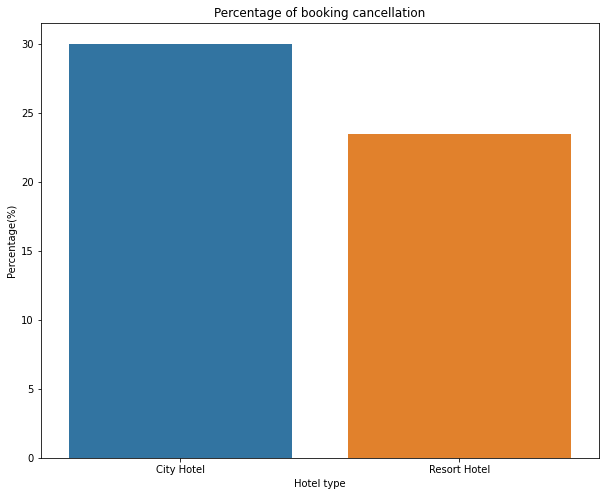

In [27]:
canceled_df=hotel_df[hotel_df['is_canceled']==1]

canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=hotel_df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)

plt.figure(figsize=(10,8))

sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")


#### **Observation**

#### City hotel has more booking cancellation than resort hotel.

### **4)Which hotel has longer waiting time?**

Text(0.5, 1.0, 'Waiting time for each hotel type')

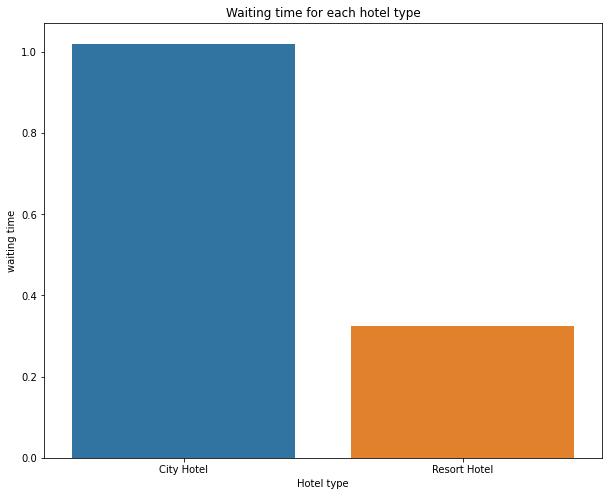

In [30]:
waiting_time_df=hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(10,8))

sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")


#### **Observation**
####So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

### **5) Which Hotels has the most repeated guests?**


Text(0.5, 1.0, 'Most repeated guests for each hotel')

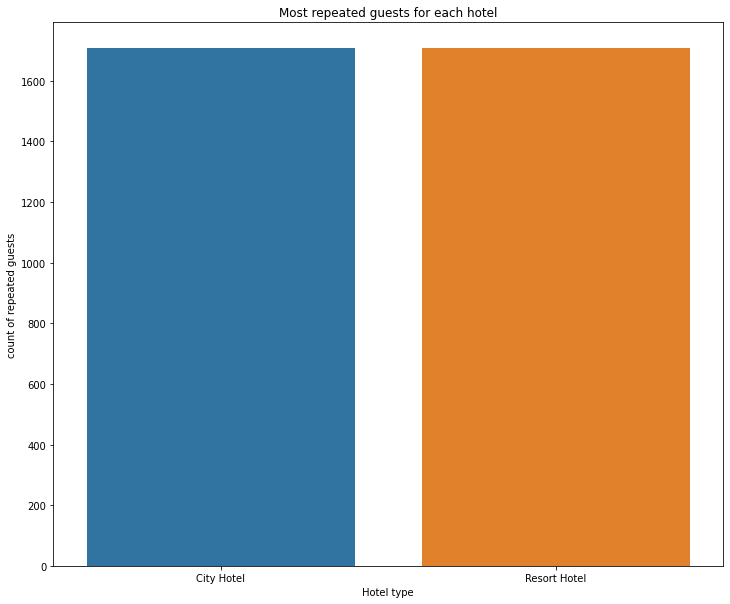

In [29]:
# repeated guest=1
# non repeated guest=0
repeated_guests_df=hotel_df[hotel_df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})

plt.figure(figsize=(12,10))

sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")


#### **Observation**
####It is almost similar for both hotels.

### **6)Which month has the highest ADR?**

In [31]:
bookings_by_months_df=hotel_df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,94.763375
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


Text(0, 0.5, 'ADR')

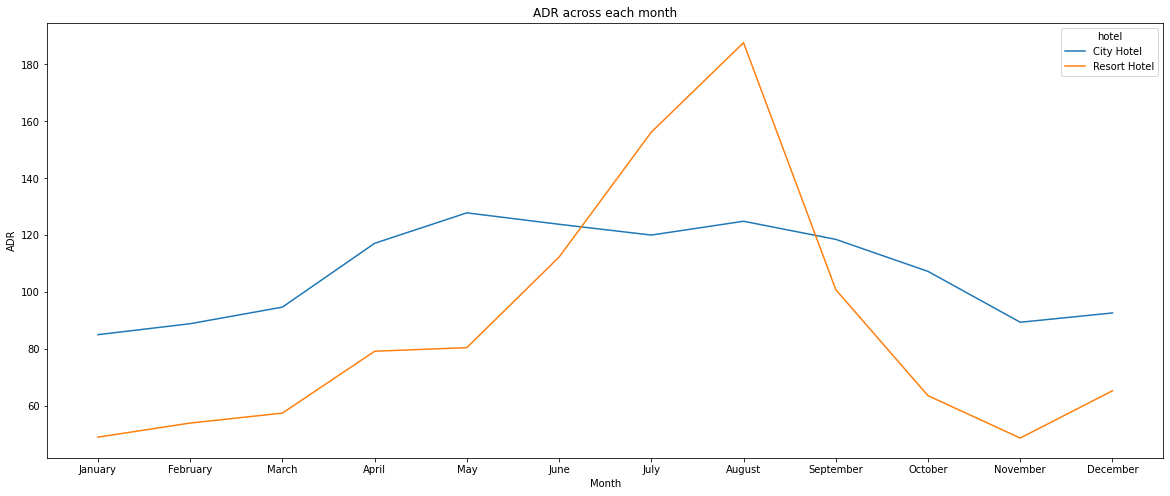

In [32]:
plt.figure(figsize=(20,8))

sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')




#### **Observation**
####For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

####The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

### **7)Which distribution channel contributed more to adr in order to increase the the income?**

Text(0.5, 1.0, 'ADR across Distribution channel')

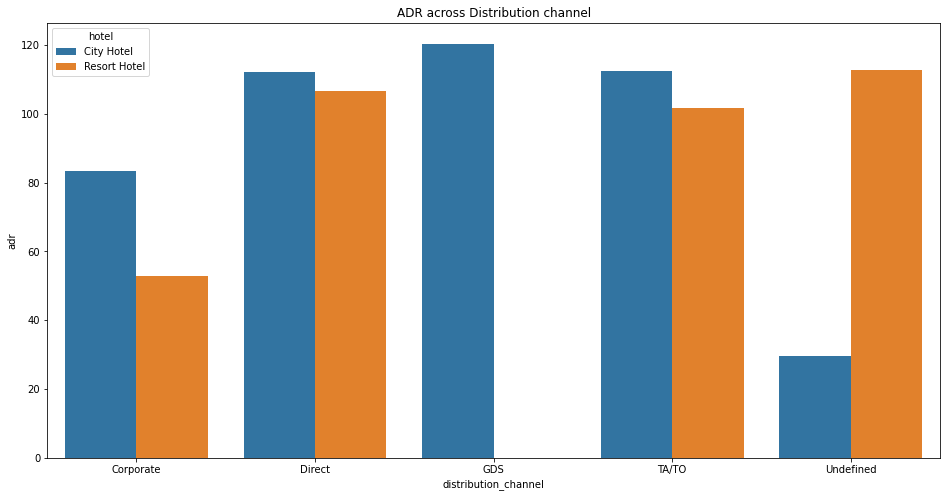

In [33]:
distribution_channel_df=hotel_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(16,8))

sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')

plt.title('ADR across Distribution channel')




* Corporate- These are corporate hotel booing companies which makes bookings possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

#### **Observation**
**From the plot is clear that**
####'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
####GDS has highly contributed in adr in 'City Hotel' type.
####GDS needs to increase Resort Hotel bookings.



### **8) Which distribution channel has the higest cancellation rate?**

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

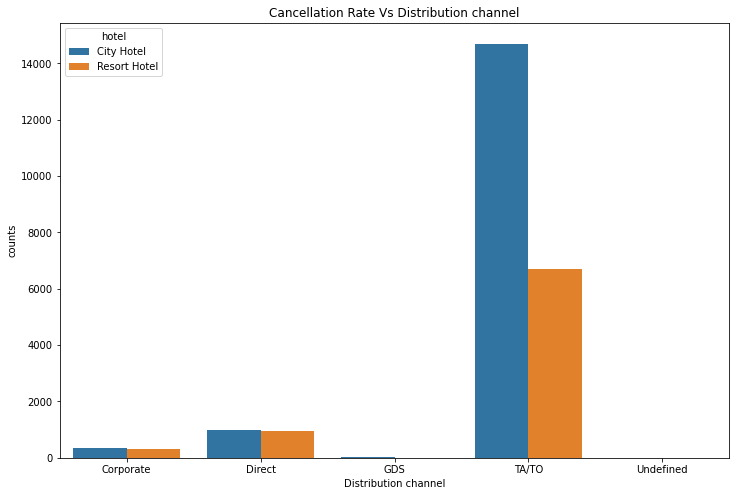

In [34]:
canceled_df=hotel_df[hotel_df['is_canceled']==1] # 1= canceled

canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})

plt.figure(figsize=(12,8))

sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')


#### **Observation**
####In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.
####In "direct" both the hotels has almost same cancellation rate.

### **9)Which Market Segment has the higest cancellation rate?**

In [35]:
market_segment_df=hotel_df[hotel_df['is_canceled']==1]  
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

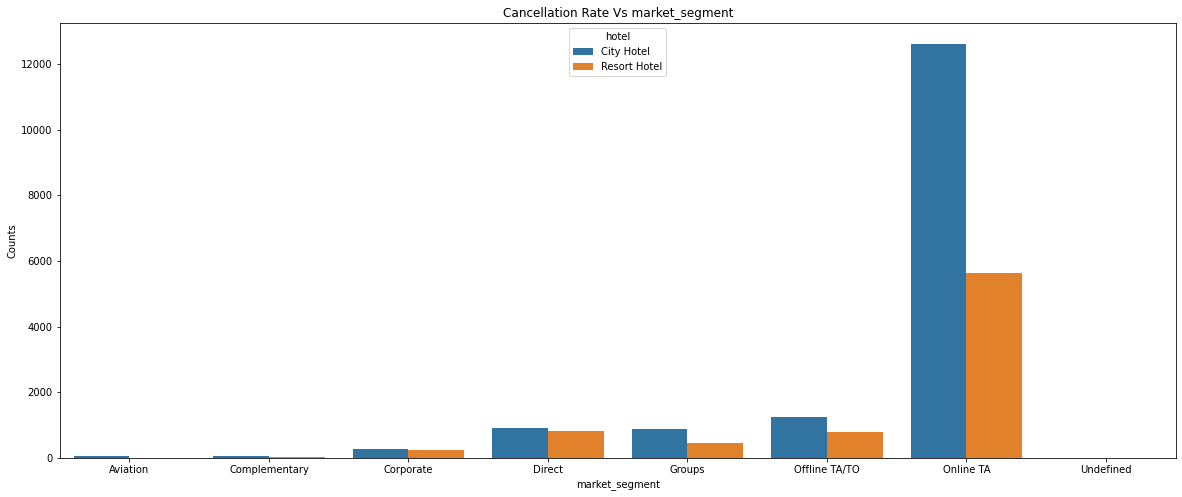

In [36]:
plt.figure(figsize=(20,8))

sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')


#### **Observation**
####'Online T/A' has the highest cancellation in both type of cities
####In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

### **10) Does the guests alloted with the same room type which was reserved by them?**

In [37]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

([<matplotlib.axis.XTick at 0x7fd13fe27e10>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

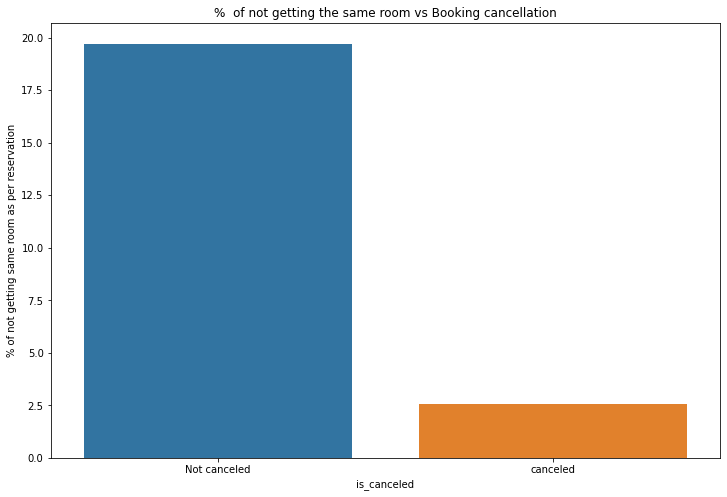

In [38]:
# create new column to hotel_df
hotel_df['Same_room_alloted_or_not']=hotel_df.apply(lambda x: same_room_allotment(x),axis=1)

grp_by_canceled_df=hotel_df.groupby('is_canceled')

# create new_df and calculate  percentage of same room alloted  or not
new_df=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
new_df

plt.figure(figsize=(12,8))

sns.barplot(x=new_df.index,y=new_df['percentage'])

plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])




#### **Obseravtion**
####Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

### **11) ADR across different market segment**

Text(0.5, 1.0, 'Adr across market segment')

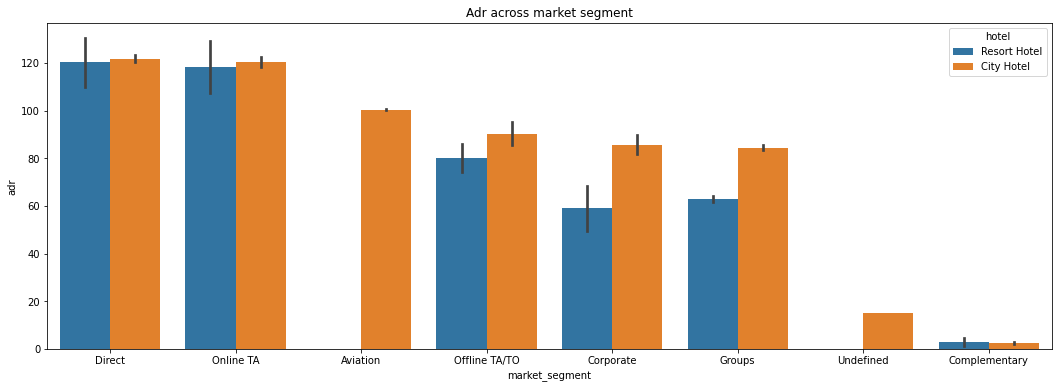

In [39]:
df_grupby=hotel_df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

plt.figure(figsize=(18,6))

sns.barplot(x='market_segment',y='adr',hue='hotel',data=df_grupby.sort_values(by='adr',ascending=False))

plt.title('Adr across market segment')

#### **Obseravtion**
####'Direct' and 'Online TA' are contributing the most in both types of hotels.
####Aviation segment should focus on increasing the bookings of 'City Hotel'

### **12)What is the Optimal stay length in both types of hotels ?**

Text(0.5, 0, 'total_stay(days)')

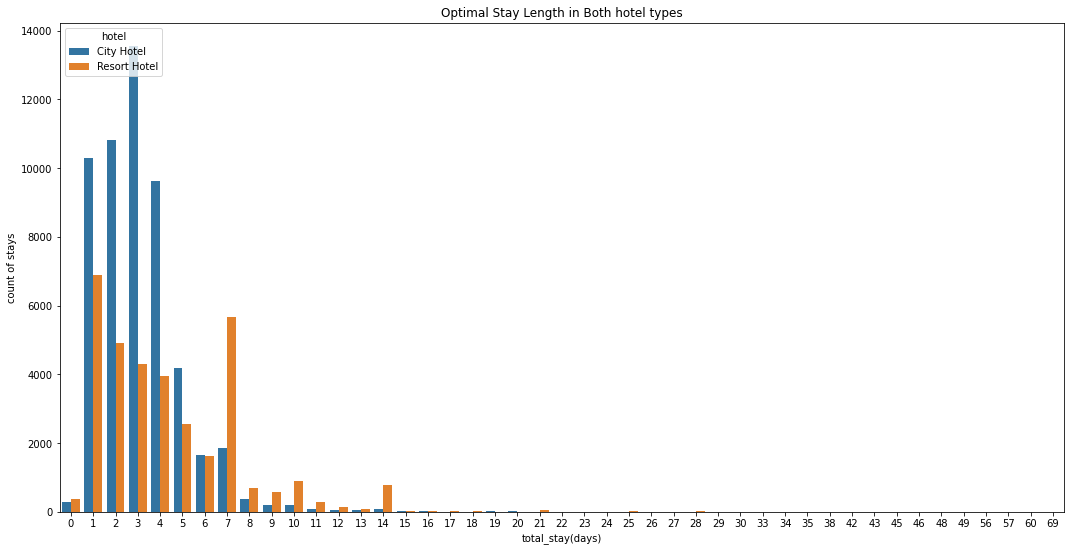

In [23]:
stay = hotel_df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns


plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

#### **Observation:**
####Optimal stay in both the type hotel is less than 7 days.

### **13)Relationship between ADR and total stay.**

In [64]:
adr_vs_stay = hotel_df.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,210.86,Resort Hotel
17996,7,211.00,Resort Hotel
17997,7,211.03,Resort Hotel
17998,7,211.16,Resort Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

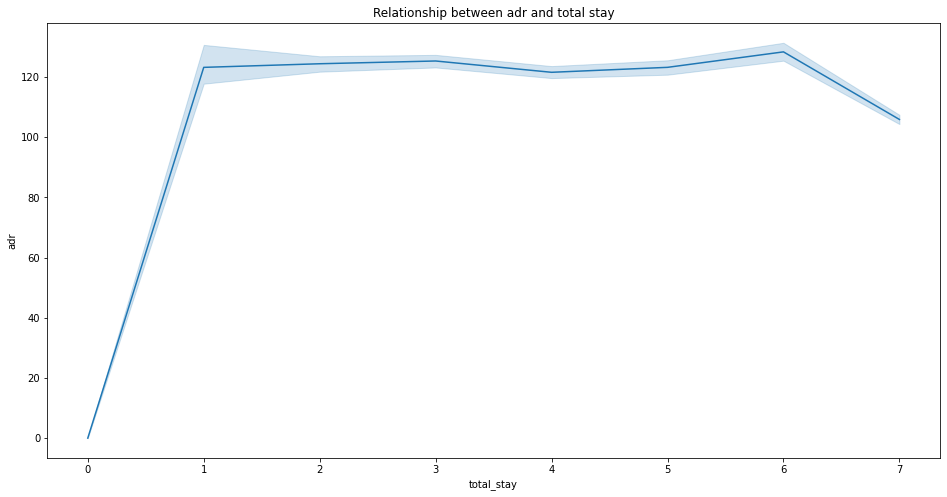

In [65]:
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

#### **Observation:**
#### As the total stay increases the adr also increases.

### **14) Correlation of the columns**

Text(0.5, 1.0, 'Co-relation of the columns')

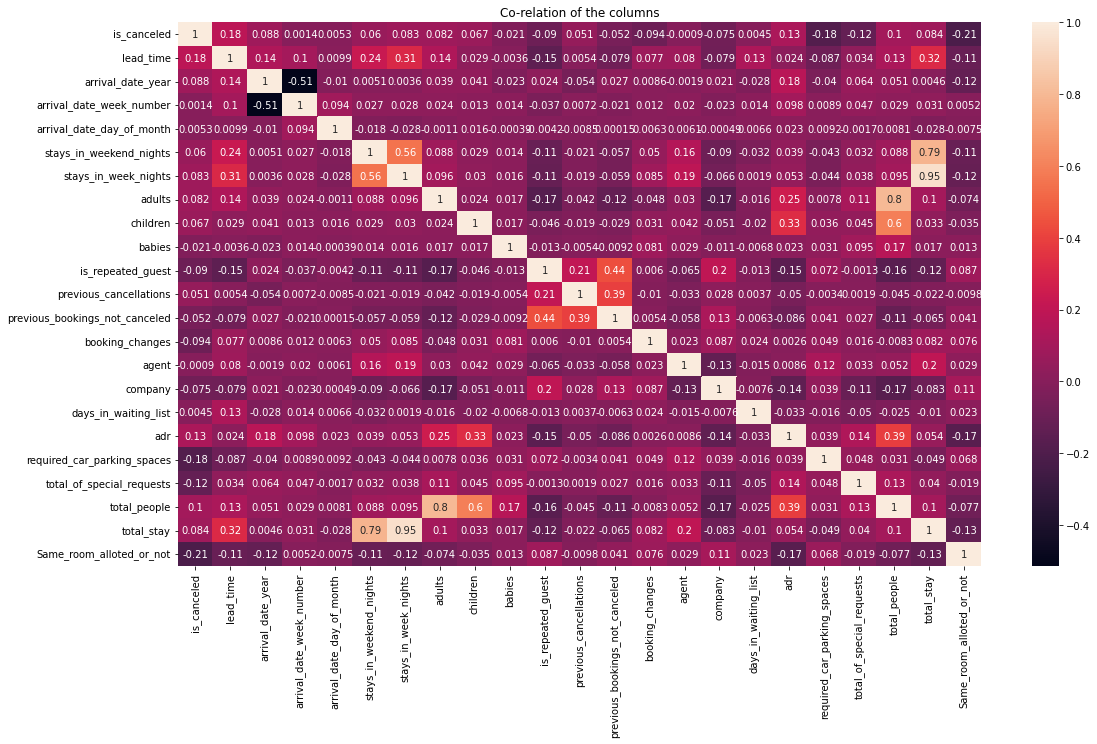

In [67]:
plt.figure(figsize=(18,10))
sns.heatmap(hotel_df.corr(),annot=True)
plt.title('Co-relation of the columns')

* is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
* lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
* adults,childrens and babies are corelated to each other. That means more the people more will be adr.
* is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

### 1**5)Relationship between the repeated guests and previous bookings not canceled?**

In [68]:
repeated_guests_df=hotel_df[hotel_df['is_repeated_guest']==1]
repeated_guests_df_1=hotel_df[hotel_df['is_repeated_guest']==0]

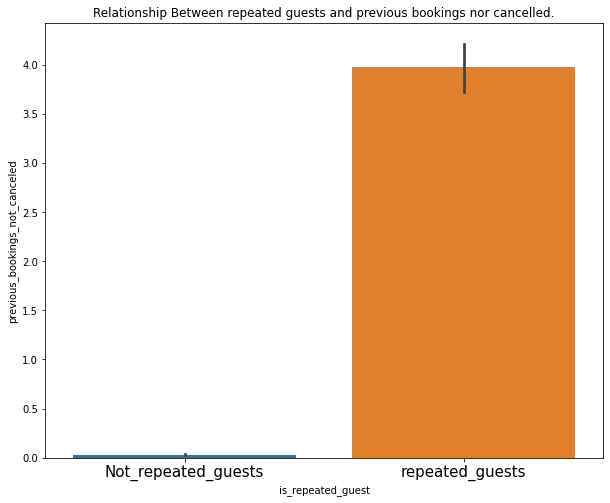

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x=hotel_df['is_repeated_guest'],y= hotel_df['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

#### **Observation**
####Not Repeated guests are more likely to cancel their bookings.

Text(0.5, 1.0, 'Relationship between  adr and total stay')

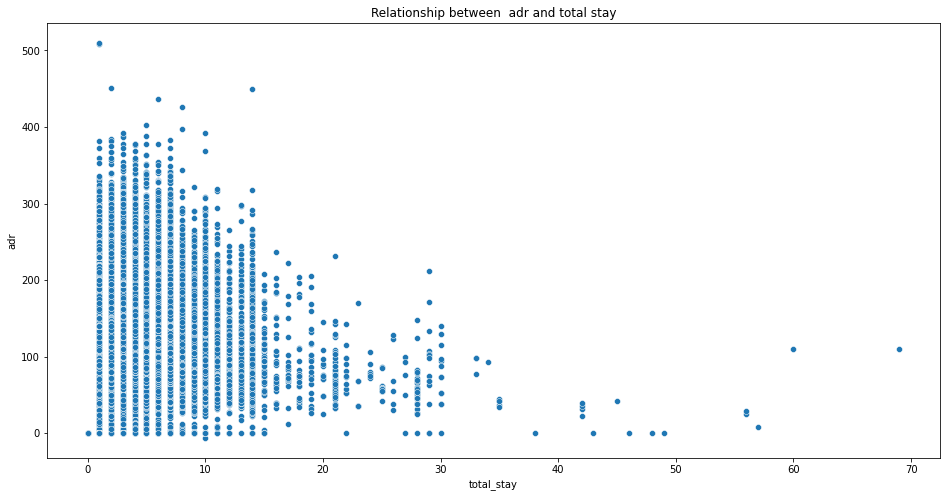

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

plt.figure(figsize=(16,8))
sns.scatterplot(x=hotel_df['total_stay'],y=hotel_df['adr'])
plt.title('Relationship between  adr and total stay')

####From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

### **16) Relationship between  adr and total stay**

Text(0.5, 1.0, 'Relationship between  adr and total stay')

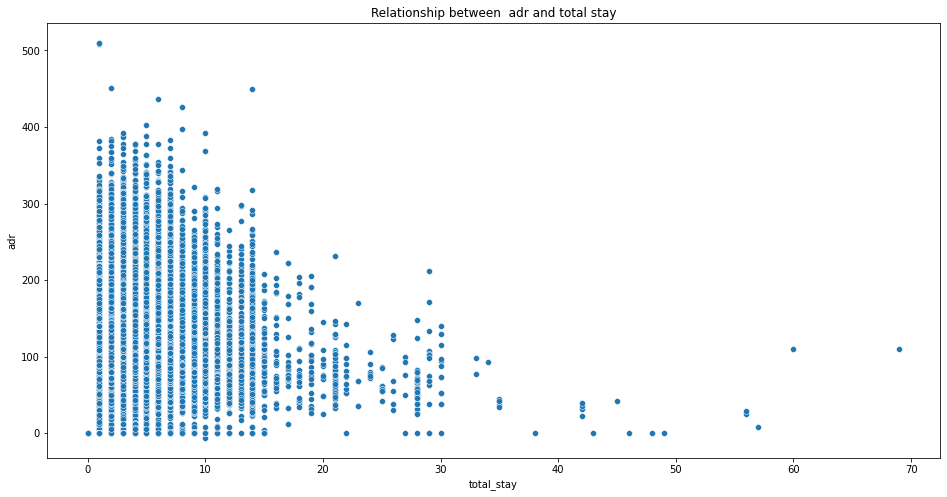

In [71]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)
plt.figure(figsize=(16,8))
sns.scatterplot(x=hotel_df['total_stay'],y=hotel_df['adr'])
plt.title('Relationship between  adr and total stay')

### **17)ADR relationship with total number of people**

Text(0.5, 1.0, 'ADR v/s Total Number of people')

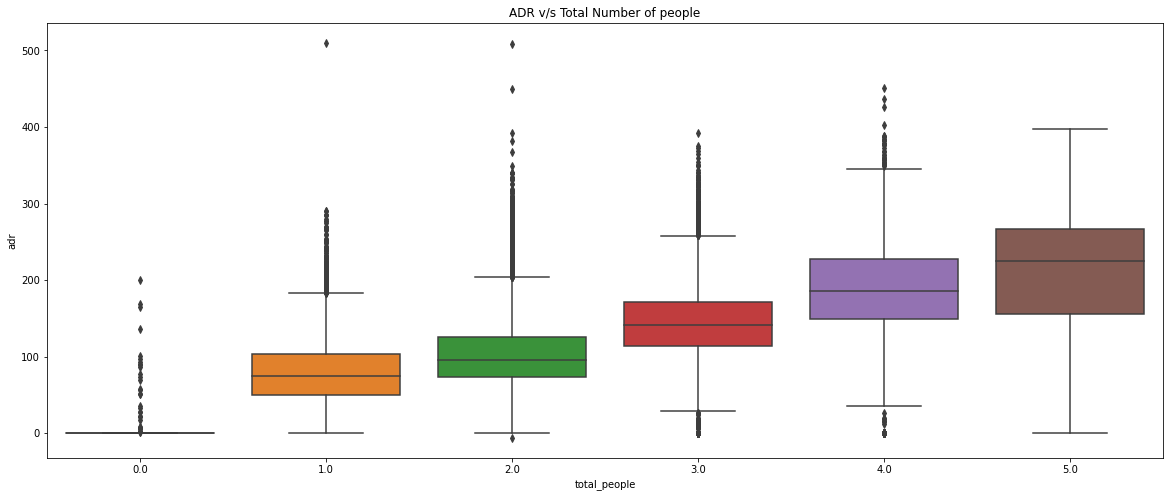

In [73]:
plt.figure(figsize=(20,8))
new_df2=hotel_df[hotel_df['total_people'] < 6]
# new_df2.head()

sns.boxplot(x=new_df2['total_people'],y=new_df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

####As the total number of people increases adr also increases.
####Thus adr and total people are directly proportional to each other.

##**Conclusions:**

* City hotels are the most preferred hotel type by the guests. We can say City 
hotel is the busiest hotel.
* 27.5 % bookings were got cancelled out of all the bookings.
* Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
* The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.
* Most of the customers (91.6%) do not require car parking spaces.
* 79.1 % bookings were made through TA/TO (travel agents/Tour operators).
* BB( Bed & Breakfast) is the most preferred type of meal by the guests.
* Maximum number of guests were from Portugal, i.e. more than 25000 guests.
* Most of the bookings for City hotels and Resort hotel were happened in 2016.
* Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
* Booking cancellation rate is high for City hotels which almost 30 %.
* Average lead time for resort hotel is high.
* Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
* Resort hotels have the most repeated guests.
* Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
* Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.